# TP 1 Reinforcment Learning

Remarques :

. Deux parties : dans la première on suppose qu'on connait le MDP et dans la deuxième on se base sur des données et on ne connaît pas le MPD.

. Suitable structures : pour $p(y,a,x)$ qu'il va falloir store , on peut $p_{1}(y,x)$ et $p_{2}(y,x)$

. Faire tout en vectoriel matrix form

. Faire un truc simple pour modéliser le growth du tree

. Lorsque le tree est malade et qu'on le coupe on prend un reward négatif car il ne va rien rapporter en bois

.tree_sim une étape et tree_MDP c'est le truc entier. 

### Modelisation

* L'arbre est modélisé par un entier entre 0 et H. (au début à zéro) c'est le state space.

* Action space : 0 ou 1 (cut ou pas cut)

* Reward :
    - Maintenance : reward -10
    - Unit of wood : reward 10
    - Cost of planting : reward -5
    
* Discount factor : $\gamma=\frac{1}{1+r}$ avec $r=0.05$



### Growth of tree

A chaque itération on a une proba 3/4 que l'arbre grandisse d'une unité.

Ensuite il peut tomber malade avec un probabilité 1/16.

Grandir de deux unités avec une proba de 1/16. 

Ne pas grandir avec une probabilité 1/8.

Si l'arbre est malade il ne peut pas grandir.

### Variables

a c'est l'action integer

r reward integer

state x just the tree de 0 à H.

In [88]:
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [134]:
class Tree:
    
    def __init__(self,initSize,H,valueUnitOfWood=10,costOfPlanting=-5,costOfMaintenance=-10):
        self.size=initSize
        self.state='healthy'
        self.Hmax=H
        self.valueUnitOfWood=valueUnitOfWood
        self.costOfPlanting=costOfPlanting
        self.costOfMaintenance=costOfMaintenance
        
    def tree_sim(self,x,a,verbose=0):
        
        reward=0
            
        if a==0 : # on coupe pas l'arbre
            choose=random.random()

            # L'arbre tombe malade avec proba 1/16
            
            if choose<=(1/16) :
                if verbose==1 :
                    print('The tree is getting sick')
                self.state='sick'
                reward=self.costOfMaintenance
              
            # L'arbre grandit de 2 avec proba 1/16
            
            if choose>1/16 and choose<=(2/16) and self.state=='healthy':
                if verbose==1 :
                    print('The tree grows of two units')
                
                if x<self.Hmax:
                    x=x+2
                
                reward=self.costOfMaintenance
             
            # L'arbre ne grandit pas avec proba 1/8
            
            if choose>(2/16) and choose<=(4/16):
                if verbose==1 :
                    print('The tree does not grow')
                    
                reward=self.costOfMaintenance

            # L'arbre grandit d'une unité avec proba 3/4
            
            if choose>(4/16) and choose<=1 and self.state=='healthy':
                if verbose==1 :
                    print('The tree grows of one unit')
                
                if x<self.Hmax:
                    x=x+1
                
                reward=self.costOfMaintenance

        if a==1 : # on coupe l'arbre et on en plante un autre de hauteur 1
            
            # on gagne la taille*la valeur de chaque bout de bois - le coût de la plantation
            reward=x*self.valueUnitOfWood-self.costOfPlanting 
            x=1
                        
        return reward,x
        
    def tree_MDP(self,actions):
        
        rewards=[]
        treeSizes=[]
        treeHealth=[]
        
        for a in actions:
            x=self.tree_sim(self.size,a)[1]
            r=self.tree_sim(self.size,a)[0]
            self.size=x
            treeSizes.append(x)
            rewards.append(r)
            treeHealth.append(self.state)
            
        return rewards,treeSizes,treeHealth
            
        
        
   
    

In [130]:
class MDP :
    
    def __init__(self,initSize,H,valueUnitOfWood=10,costOfPlanting=-5,costOfMaintenance=-10):
        self.t=Tree(self,initSize,H,valueUnitOfWood,costOfPlanting,costOfMaintenance)
        self.rewardAmount=0
        
        
        

### Simulation MDP tree

In [136]:
t=Tree(initSize=0,H=100)
actions=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0]
rewards,treeSizes,treeHealth=t.tree_MDP(actions)

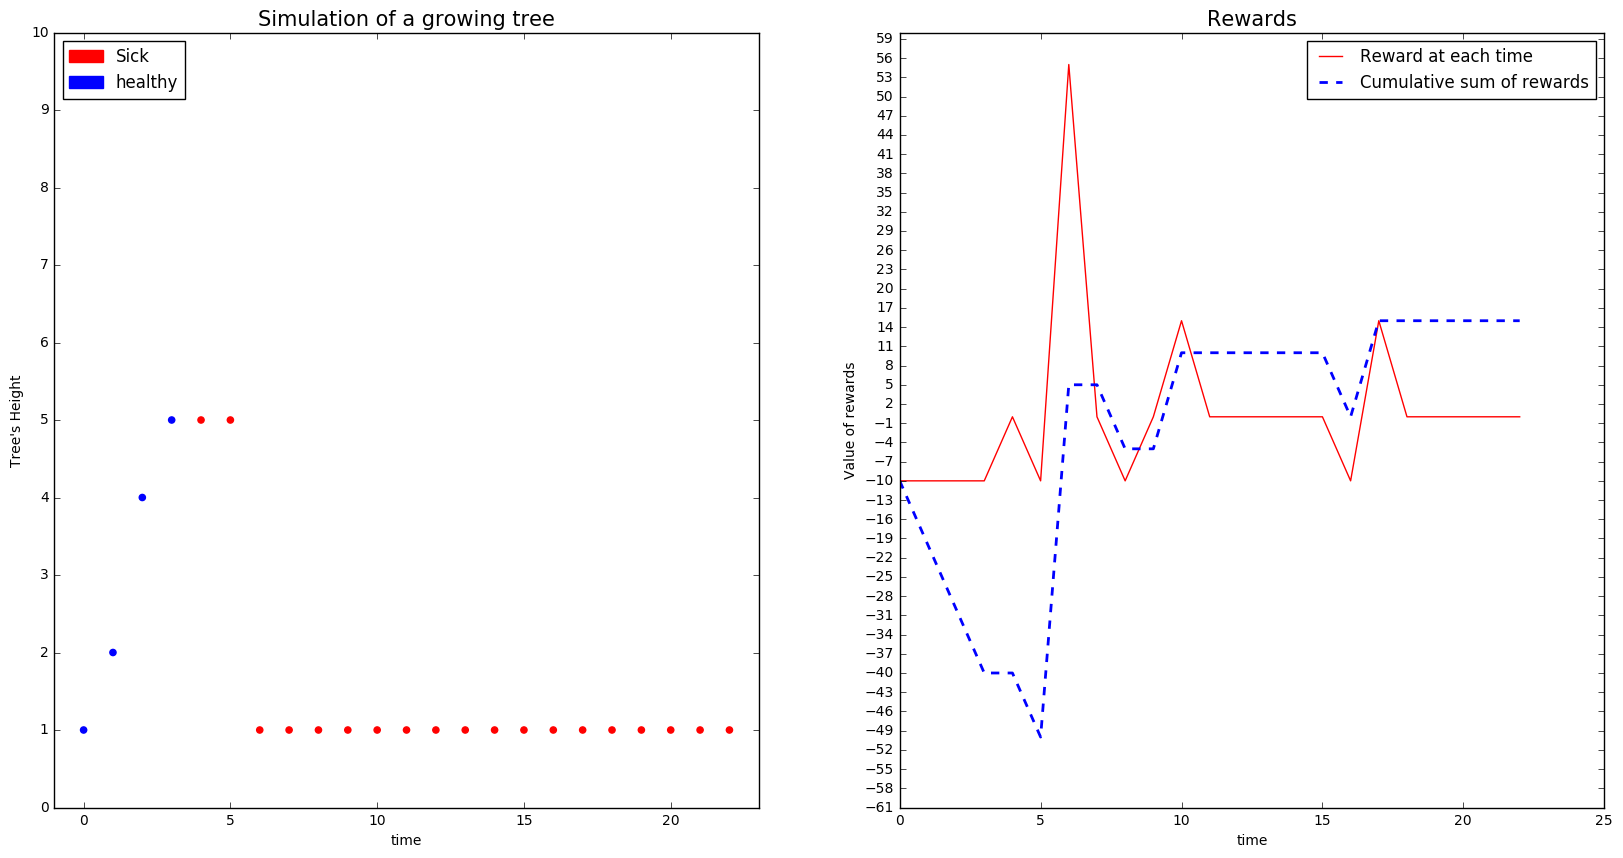

In [157]:
use_colours = {"healthy": "blue", "sick": "red"}

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(range(len(actions)),treeSizes,color=[use_colours[x] for x in treeHealth])
plt.xlim([-1,len(actions)])
plt.ylim([0,10])
plt.title('Simulation of a growing tree', fontsize=15)
plt.ylabel('Tree\'s Height', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.yticks(range(11))
red_patch = mpatches.Patch(color='red', label='Sick')
blue_patch = mpatches.Patch(color='blue', label='healthy')
plt.legend(handles=[red_patch,blue_patch],loc=2)

plt.subplot(1,2,2)
plt.plot(rewards,'r-')
plt.plot(np.cumsum(rewards),'b--',lw=2)
plt.title('Rewards', fontsize=15)
plt.ylabel('Value of rewards', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.yticks(range(-61,61,3))
plt.legend(['Reward at each time','Cumulative sum of rewards'])

plt.show()

In [149]:
np.cumsum(rewards)

-10

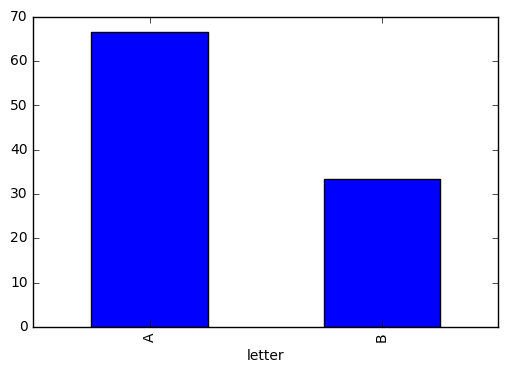

In [52]:
liste=['A']*2+['B']*1
h=list()
for i in range(200000):
    h.append(random.choice(liste))
H=pd.DataFrame(h,columns=['letter'])
a=H.groupby('letter').letter.count()
b=100*(a/a.sum())
b.plot(kind='bar')
plt.show()

In [53]:
a=2

0.42459037355771